In [1]:
import sys
sys.path.append("./src/")
import lumberjack
import tree_reader as tr


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
johnston_counts = np.loadtxt("/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/counts.txt")
johnston_header = np.loadtxt("/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/header.txt",dtype=str)

In [4]:
import scipy.cluster.hierarchy as hr

dndr = hr.dendrogram(hr.linkage(johnston_counts.T),no_plot=True)
feature_sort = dndr['leaves']

johnston_counts = johnston_counts.T[feature_sort].T
johnston_header = johnston_header[feature_sort]

In [5]:
test_mask = np.random.random(johnston_counts.shape[0]) < .1
training_cells = johnston_counts[np.logical_not(test_mask)]
testing_cells = johnston_counts[test_mask]
print(training_cells.shape)
print(testing_cells.shape)

(2332, 1000)
(253, 1000)


In [6]:
print(johnston_counts.shape)
print(johnston_header.shape)
print(johnston_counts[:10,:10])
print(johnston_header[:10])

(2585, 1000)
(1000,)
[[-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
  -0.2096384  -0.02874179 -0.29427373 -0.04176272]
 [-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
  -0.2096384  -0.02874179 -0.29427373 -0.04176272]
 [-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
  -0.2096384  -0.02874179 -0.29427373 -0.04176272]
 [-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
   2.7713654  -0.02874179 -0.29427373 -0.04176272]
 [ 1.95513761 -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
  -0.2096384  -0.02874179 -0.29427373 -0.04176272]
 [-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
   3.90863538 -0.02874179  2.81274486 -0.04176272]
 [-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
  -0.2096384  -0.02874179 -0.29427373 -0.04176272]
 [-0.3921099  -0.10692903 -0.03949586 -0.06959916 -0.08679441 -0.59222937
  -0.2096384  -0.02874179  4.9

In [7]:
# forest = lumberjack.fit(training_cells,trees=20,dispersion_mode="var",norm="l2",in_feature_subsample=200,out_feature_subsample=200,sample_subsample=300,depth=8,header=johnston_header)
# lumberjack.save_trees("/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/",training_cells,trees=200,dispersion_mode="ssme",norm="l1",drop='none',sfr=1,in_feature_subsample=100,out_feature_subsample=100,sample_subsample=200,depth=10,leaves=10,header=johnston_header)

In [8]:
forest = tr.Forest.load("/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/",prefix="tmp.*.compact",header="tmp.header",truth="output.counts")
# forest = tr.Forest.load()

['/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.80.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.90.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.39.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.29.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.195.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.185.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.16.compact', '/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/trees/temp/tmp.171.compac

In [9]:
leaves = forest.leaves()
print(len(leaves))

4753


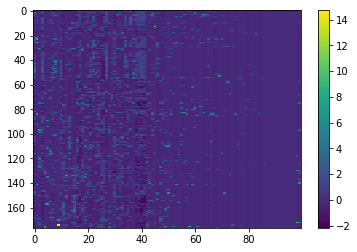

[[0.395, [[0.3924050632911392, [[0.3225806451612903, []], [0.6774193548387096, [[0.7142857142857143, [[0.4, []], [0.6, []]]], [0.2857142857142857, []]]]]], [0.6075949367088608, [[0.3958333333333333, [[0.631578947368421, [[0.5833333333333334, []], [0.4166666666666667, []]]], [0.3684210526315789, []]]], [0.6041666666666666, [[0.5172413793103449, [[0.4, []], [0.6, []]]], [0.4827586206896552, [[0.5714285714285714, []], [0.42857142857142855, []]]]]]]]]], [0.605, [[0.512396694214876, [[0.4838709677419355, [[0.6, [[0.5555555555555556, []], [0.4444444444444444, []]]], [0.4, [[0.5, []], [0.5, []]]]]], [0.5161290322580645, [[0.5, [[0.5, []], [0.5, []]]], [0.5, [[0.5, []], [0.5, []]]]]]]], [0.48760330578512395, [[0.5423728813559322, [[0.5625, [[0.5555555555555556, []], [0.4444444444444444, []]]], [0.4375, [[0.42857142857142855, []], [0.5714285714285714, []]]]]], [0.4576271186440678, [[0.5555555555555556, [[0.4, []], [0.6, []]]], [0.4444444444444444, [[0.6666666666666666, []], [0.3333333333333333,

/Users/boris/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


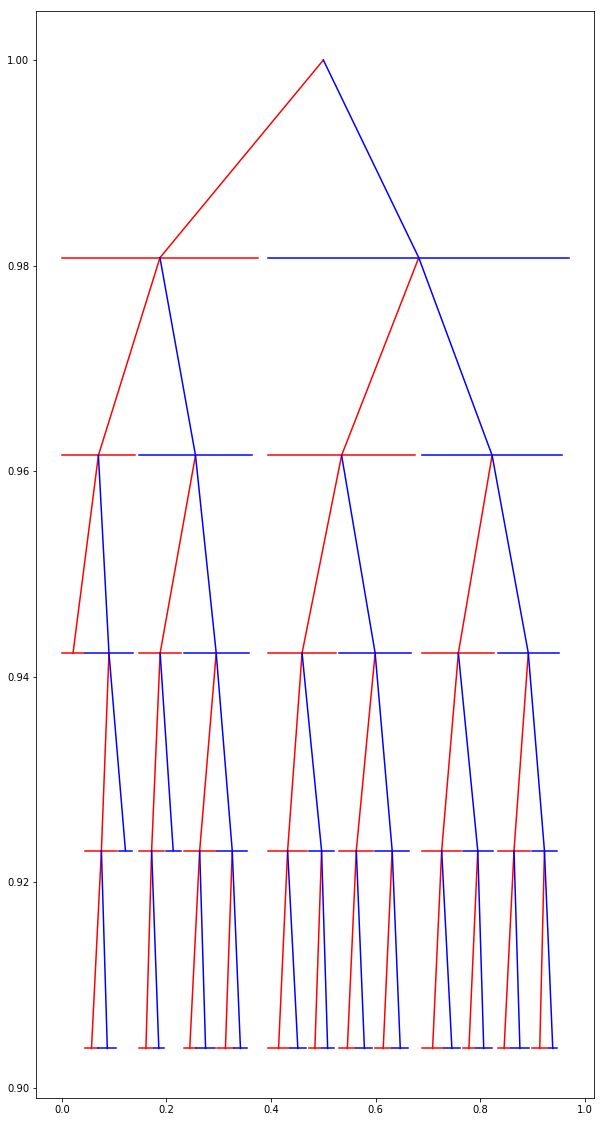

In [10]:
# forest.trees[45].root.children[1].samples

tree_index = 24

forest.trees[tree_index].plot_leaf_counts()
forest.trees[tree_index].plot()
# print(forest.trees[0].feature_levels())

In [11]:
# print(len(leaves))
# print(forest.weighted_predict_nodes(leaves))
# print("\n\n\n\n\n\n\n\n\n")

leaf_1_counts = leaves[1].ordered_node_counts()
recomputed_medians = np.median(leaf_1_counts,axis=0)

print(leaves[1].medians)
print(recomputed_medians)

[-0.1908690743148327, -0.12192147970199585, -0.8640304803848267, -0.14811860769987106, -0.20958811044692993, -0.18070128560066223, -0.07593338191509247, -0.09524708986282349, -0.11061522364616394, -0.07425632327795029, -0.08126211166381836, -0.08942048251628876, -0.0795205757021904, 0.3300550803542137, -0.13283655047416687, -0.27268898487091064, -0.31579387187957764, -0.3657653033733368, 0.009608343243598938, -0.18311059474945068, -0.0450618751347065, 0.12650691531598568, -0.09000501781702042, -0.15426017343997955, -0.2681955397129059, -0.032895103096961975, -0.5029029250144958, -0.08994784206151962, -0.08512601256370544, -0.6536908149719238, -0.04807461425662041, -0.14605605602264404, -0.6592301726341248, -0.3789299726486206, -0.06635194271802902, -0.1647871732711792, -0.40516018867492676, -0.7156193256378174, -0.16346734762191772, -0.23684906959533691, -0.09287997335195541, -0.10064410418272018, -0.050444792956113815, -0.07924292236566544, -0.10963483899831772, -0.6031455397605896, -

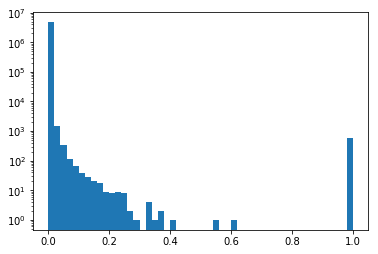

In [12]:
forest.weigh_leaves(positive=True)
# plt.figure()
# plt.imshow(forest.feature_weight_matrix())
# plt.show()

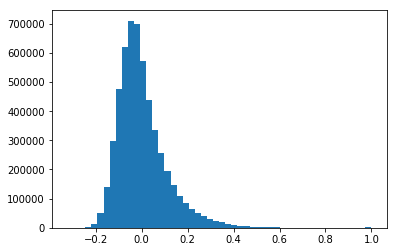

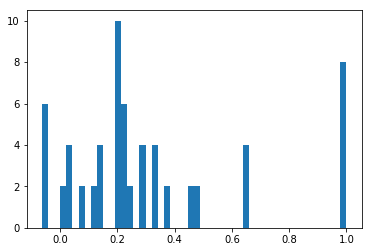

[[1.         0.07565749]
 [0.07565749 1.        ]]


In [13]:
plt.figure()
plt.hist(np.corrcoef(training_cells).flatten(),bins=50)
plt.show

lc = leaves[5].node_counts()

plt.figure()
plt.hist(np.corrcoef(lc).flatten(),bins=50)
plt.show()

sample_leaves = forest.predict_vector_leaves(training_cells[3])
prediction = forest.raw_predict_nodes(sample_leaves)
consolidated_prediction = forest.predict_matrix([training_cells[3],])

# for sample in training_cells:
#     print(np.corrcoef(sample,consolidated_prediction))


# first_leaf = sample_leaves[1]
# print(len(first_leaf.samples))
# print(first_leaf.level)
# print(len(first_leaf.features))

# raw_medians = np.median(first_leaf.ordered_node_counts(),axis=0)

# for sample in first_leaf.ordered_node_counts():
#     print(np.corrcoef(sample,consolidated_prediction))
    

# np.corrcoef(raw_medians,training_cells[3])
# print(len(sample_leaves))
# for i,feature in enumerate(johnston_header):
#     print(feature)
#     print(training_cells[3,i])
#     print(consolidated_prediction[0,i])
#     print(prediction[feature])

print(np.corrcoef(consolidated_prediction[0],training_cells[3]))    
# print(consolidated_prediction[0],training_cells[3])

# plt.figure()
# plt.scatter(consolidated_prediction[0],training_cells[3],s=.1)
# plt.show()

# print(prediction)
# print("\n\n\n\n\n\n\n")
# print(training_cells[3])
# print([x.samples[:10] for x in sample_leaves])
# for leaf in sample_leaves:
#     print("3" in leaf.samples)

# print(training_cells.shape)

In [14]:
# from scipy.stats import pearsonr
# pearsonr(consolidated_prediction[0],training_cells[3])

In [15]:
# print(sample_leaves[0].medians)
# print(sample_leaves[1].medians)

[[1.         0.26757917]
 [0.26757917 1.        ]]


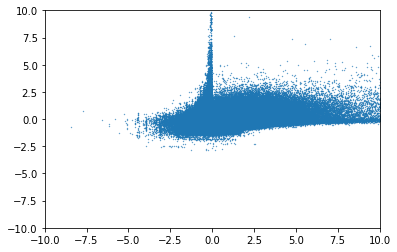

In [16]:
prediction = forest.predict_matrix(training_cells,weighted=True)
print(np.corrcoef(training_cells.flatten(),prediction.flatten()))

plt.figure()
plt.scatter(training_cells.flatten(),prediction.flatten(),s=.1)
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.show()

In [17]:
# prediction = forest.predict_matrix(training_cells,features=johnston_header)
# prediction.shape

In [18]:
# np.corrcoef(training_cells.flatten(),prediction.flatten())

[[1.        0.3818338]
 [0.3818338 1.       ]]


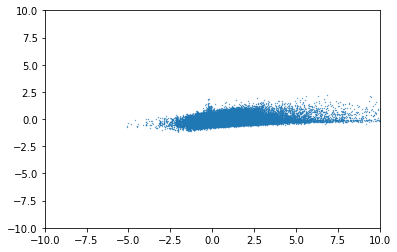

In [19]:
prediction = forest.predict_matrix(testing_cells,features=johnston_header,weighted=False)
print(np.corrcoef(testing_cells.flatten(),prediction.flatten()))

plt.figure()
plt.scatter(testing_cells.flatten(),prediction.flatten(),s=.1)
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.show()


In [20]:
# print(list(prediction[:10,:10]))
# print(list(testing_cells[:10,:10]))

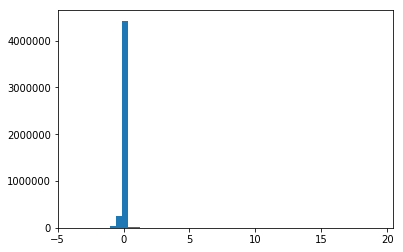

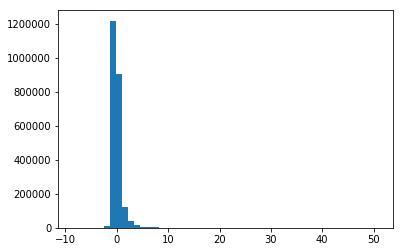

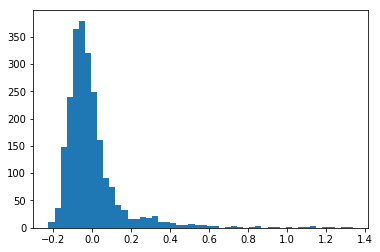

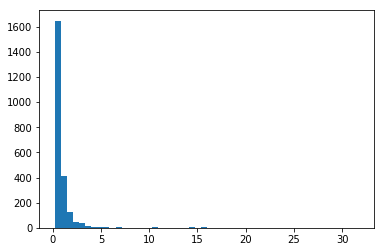

In [21]:
log = False
plt.figure()
plt.hist(forest.raw_prediction_matrix(leaves).flatten(),bins=50,log=log)
plt.show()

plt.figure()
plt.hist(training_cells.flatten(),bins=50,log=log)
plt.show()

plt.figure()
plt.hist(np.mean(training_cells,axis=1),bins=50,log=log)
plt.show()

plt.figure()
plt.hist(np.var(training_cells,axis=1),bins=50,log=log)
plt.show()